In [39]:
# PanCard Level1 CNN Feature Comparision
import os
import cv2
import numpy as np
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout

In [40]:
img_size = 100
datadir = r'C:\Users\localadmin\OneDrive\Desktop\MIni Project\First-level\images'    # root data directiory 
CATEGORIES = os.listdir(datadir)
print(CATEGORIES)

['fake', 'real']


In [41]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [42]:
# Preprocessing Function
def PreProcess(img_size, path):

    x, y = [], []
    
    CATEGORIES = os.listdir(path)
    
    print("Found {} classes: {}".format(len(CATEGORIES), CATEGORIES))
    
    for category in CATEGORIES:
        
        path = os.path.join(datadir, category)
        classIndex = CATEGORIES.index(category)
        
        for imgs in tqdm(os.listdir(path)):
            
            img_arr = cv2.imread(os.path.join(path, imgs))

            # resize the image
            resized_array = cv2.resize(img_arr, (img_size, img_size))
            cv2.imshow("images", resized_array)
            cv2.waitKey(1)
            
            # Normalize the image 
            resized_array = resized_array/255.0
            x.append(resized_array)
            y.append(classIndex)
            
    cv2.destroyAllWindows()
    
    return x, y, CATEGORIES

x, y, CATEGORIES = PreProcess(img_size, datadir)


Found 2 classes: ['fake', 'real']


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 22.61it/s]


In [43]:
# Split the dataset into training and testing
X_train, x_test, Y_train, y_test = train_test_split(x, y, random_state=42)

# Convert all the list to numpy array
X_train = np.array(X_train)
x_test = np.array(x_test)
Y_train = np.array(Y_train)
y_test = np.array(y_test)

In [44]:
# Build the model
model = Sequential()

model.add(Conv2D(16, (3, 3), input_shape=(img_size, img_size, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), strides=2, activation="relu"))
model.add(Conv2D(64, (3, 3),  activation="relu"))
model.add(Conv2D(8, (3, 3), strides=2, activation="relu"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 16)        448       
                                                                 
 conv2d_5 (Conv2D)           (None, 48, 48, 32)        4640      
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 22, 22, 8)         4616      
                                                                 
 dropout_1 (Dropout)         (None, 22, 22, 8)         0         
                                                                 
 flatten_1 (Flatten)         (None, 3872)              0         
                                                                 
 dense_3 (Dense)             (None, 50)               

In [45]:
history = model.fit(X_train, Y_train, batch_size = 2, epochs=10, verbose=1)

Epoch 1/10
388/388 [==============================] - 19s 38ms/step - loss: 0.2367 - accuracy: 0.9704
Epoch 2/10
388/388 [==============================] - 14s 37ms/step - loss: 0.1561 - accuracy: 0.9755
Epoch 3/10
388/388 [==============================] - 15s 38ms/step - loss: 0.0636 - accuracy: 0.9742
Epoch 4/10
388/388 [==============================] - 15s 37ms/step - loss: 0.0434 - accuracy: 0.9845
Epoch 5/10
388/388 [==============================] - 15s 37ms/step - loss: 0.0309 - accuracy: 0.9884
Epoch 6/10
388/388 [==============================] - 14s 37ms/step - loss: 0.1514 - accuracy: 0.9832
Epoch 7/10
388/388 [==============================] - 14s 37ms/step - loss: 0.0369 - accuracy: 0.9884
Epoch 8/10
388/388 [==============================] - 14s 37ms/step - loss: 0.2414 - accuracy: 0.9832
Epoch 9/10
388/388 [==============================] - 15s 37ms/step - loss: 0.0688 - accuracy: 0.9936
Epoch 10/10
388/388 [==============================] - 15s 37ms/step - loss: 0.022

In [46]:
accuracy = history.history['accuracy']
loss = history.history['loss']

Text(0.5, 1.0, 'Loss')

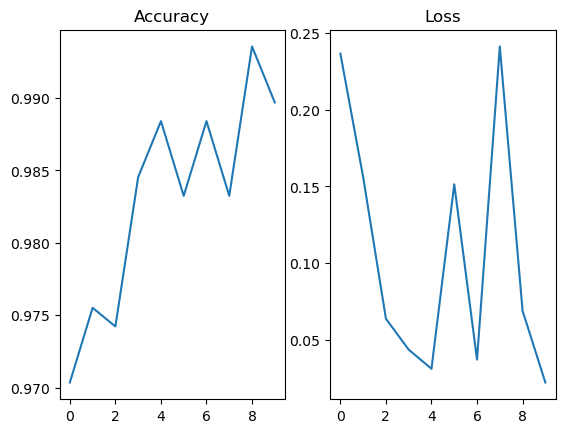

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(accuracy)
ax1.set_title("Accuracy")
ax2.plot(loss)
ax2.set_title('Loss')

In [48]:
model.evaluate(x_test, y_test)

9/9 [==============================] - 1s 78ms/step - loss: 0.0165 - accuracy: 0.9884


[0.016514770686626434, 0.9884169697761536]

In [57]:
# Load images
img_real = cv2.cvtColor(cv2.imread('images.jpeg'), cv2.COLOR_BGR2RGB)
img_fake = cv2.cvtColor(cv2.imread('fake2.jpg'), cv2.COLOR_BGR2RGB)
real = np.expand_dims(cv2.resize(img_real, (img_size, img_size)), axis=0)/255.0
fake = np.expand_dims(cv2.resize(img_fake, (img_size, img_size)), axis=0)/255.0

Text(0.5, 1.0, 'Fake')

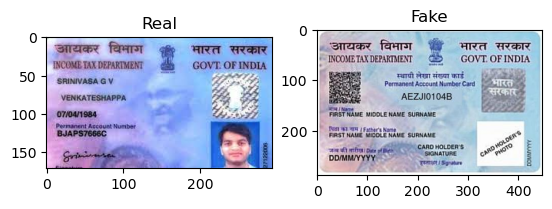

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img_real)
ax1.set_title("Real")
ax2.imshow(img_fake)
ax2.set_title('Fake')

In [59]:
# Predict from a image
pred1 = model.predict(real)
pred2 = model.predict(fake)
CATEGORIES[np.argmax(pred1)], CATEGORIES[np.argmax(pred2)]

1/1 [==============================] - 0s 62ms/step


('real', 'fake')